In [17]:
import csv
import time
import sys
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


In [2]:
def load_data(filename):
    """Load in the yaw data from the csv log

    Parameters:
    filename (str)  -- the name of the csv log

    Returns:
    yaw_data (float list)   -- the logged yaw data
    """
    f = open(filename)

    file_reader = csv.reader(f, delimiter=',')

    # Load data into dictionary with headers as keys
    # Header: Latitude, Longitude, Time Stamp(ms), ...
    # ..., Yaw(degrees), Pitch(degrees), Roll(degrees)
    data = {}
    header = next(file_reader, None)
    for h in header:
        data[h] = []

    for row in file_reader:
        for h, element in zip(header, row):
            data[h].append(float(element))

    f.close()

    yaw_data = data["Yaw(degrees)"]

    return yaw_data

In [28]:
def prediction_step(x_t_prev, sigma_sq_t_prev):
    """Compute the prediction of 1D Kalman Filter

    Parameters:
    x_t_prev        -- the previous state estimate
    sigma_sq_t_prev -- the previous variance estimate

    Returns:
    x_bar_t         -- the predicted state estimate of time t
    sigma_sq_bar_t  -- the predicted variance estimate of time t
    """

    """STUDENT CODE START"""
    x_bar_t = None
    sigma_sq_bar_t = None
    
    return [x_t_prev, sigma_sq_t_prev]
    """STUDENT CODE END"""


In [32]:
def correction_step(x_bar_t, z_t, sigma_sq_bar_t, sigma_sq_z):
    """Compute the correction of 1D Kalman Filter

    Parameters:
    x_bar_t         -- the predicted state estimate of time t
    z_t             -- the measured state of time t
    sigma_sq_bar_t  -- the predicted variance of time t
    sigma_sq_z      -- the variance of sensor measurement


    Returns:
    x_est_t         -- the filtered state estimate of time t
    sigma_sq_est_t  -- the filtered variance estimate of time t
    """

    """STUDENT CODE START"""
    #x_est_t = None
    #sigma_sq_est_t = None
    
    K_t = sigma_sq_bar_t/(sigma_sq_bar_t + sigma_sq_z)
    x_est_t = x_bar_t + K_t*(z_t - x_bar_t)
    
    sigma_sq_est_t = sigma_sq_bar_t - K_t*sigma_sq_bar_t

    """STUDENT CODE END"""

    return [x_est_t, sigma_sq_est_t]

In [5]:
def wrap_to_360(angle):
    """Wrap angle data to [0, 360]"""
    return (angle + 360) % 360


In [6]:
def wrap_to_360(angle):
    """Wrap angle data to [0, 360]"""
    return (angle + 360) % 360


def plot_yaw(yaw_dict, time_stamps, title=None, xlim=None, ylim=None):
    """Plot yaw data"""
    plt.plot(np.asarray(time_stamps),
             np.array(yaw_dict["measurements"]),
             '.',
             markersize=1)
    plt.plot(np.asarray(time_stamps),
             np.array(yaw_dict["estimates"]),
             '.',
             markersize=1)
    plt.plot(np.asarray(time_stamps),
             np.asarray(yaw_dict["plus_2_stddev"]),
             '.-',
             markersize=1,
             linewidth=0.5)
    plt.plot(np.asarray(time_stamps),
             np.asarray(yaw_dict["minus_2_stddev"]),
             '.-',
             markersize=1,
             linewidth=0.5)
    plt.legend(["Raw Data", "Estimate", "+2$\sigma$", "-2$\sigma$"])
    plt.title(title)
    plt.ylabel("Yaw (Degrees)")
    plt.xlabel("Time (s)")
    plt.xlim(xlim)
    plt.ylim(ylim)


In [75]:
# Read in data
filepath = "./"
filename = "2020-02-08_08_22_47.csv"
yaw_data_stationary = load_data(filepath + filename)

In [76]:
yaw_mean_stat = np.mean(yaw_data_stationary)
yaw_std_stat = np.std(yaw_data_stationary)
yaw_std

1.3876380876299863

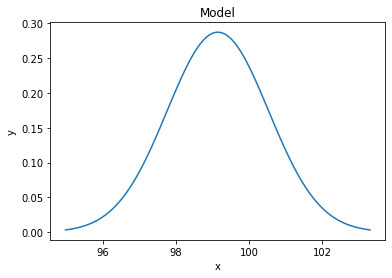

In [77]:
x = np.linspace(yaw_mean_stat - 3*yaw_std_stat, yaw_mean_stat + 3*yaw_std_stat, 100)
plt.plot(x, stats.norm.pdf(x, yaw_mean_stat, yaw_std_stat))
plt.title("Model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

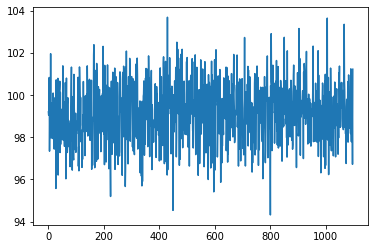

In [24]:
#def prediction_step(x_t_prev, sigma_sq_t_prev):
#def correction_step(x_bar_t, z_t, sigma_sq_bar_t, sigma_sq_z):




Done filtering...plotting...


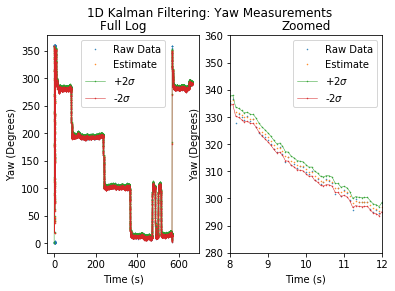

Exiting...


In [91]:
def main(var):
    """Run a 1D Kalman Filter on logged yaw data from a BNO055 IMU."""

    filepath = "./"
    filename = "2020-02-08_08_34_45.csv" # Todo for both data sets
    yaw_data = load_data(filepath + filename)

    """STUDENT CODE START"""
    SENSOR_MODEL_VARIANCE = var
    """STUDENT CODE END"""

    #  Initialize filter
    yaw_dict = {}
    yaw_est_t_prev = yaw_data[0]
    var_t_prev = SENSOR_MODEL_VARIANCE
    yaw_dict["measurements"] = yaw_data
    yaw_dict["estimates"] = []
    yaw_dict["plus_2_stddev"] = []
    yaw_dict["minus_2_stddev"] = []
    time_stamps = []

    #  Run filter over data
    for t, _ in enumerate(yaw_data):
        yaw_pred_t, var_pred_t = prediction_step(yaw_est_t_prev, var_t_prev)

        # To be explicit for teaching purposes, we are getting
        # the measurement with index 't' to show how we get a
        # new measurement each time step. To be more pythonic we could
        # replace the '_' above with 'yaw_meas'
        yaw_meas = yaw_data[t]
        var_z = SENSOR_MODEL_VARIANCE
        
        #def prediction_step(x_t_prev, sigma_sq_t_prev):
        #def correction_step(x_bar_t, z_t, sigma_sq_bar_t, sigma_sq_z):

        yaw_est_t, var_est_t = correction_step(yaw_pred_t,
                                               yaw_meas,
                                               var_pred_t,
                                               var_z)

        #  Format the printouts
#         sys.stdout.write("Yaw State Estimate: {0}\n\
#                          \rYaw Raw Data:       {1}\
#                          \033[A\r".format(yaw_est_t, yaw_meas))
#         sys.stdout.flush()

        #  Pause the printouts to simulate the real data rate
        dt = 1/13.  # seconds
        time_stamps.append(dt*t)

        #  Comment out sleep to visualize the plot immediately
        # time.sleep(dt)

        #  For clarity sake/teaching purposes, we explicitly update t->(t-1)
        yaw_est_t_prev = yaw_est_t
        var_est_t_prev = var_est_t

        # Pack data away into yaw dictionary for plotting purpose
        plus_2_stddev = wrap_to_360(yaw_est_t + 2*np.sqrt(var_est_t))
        minus_2_stddev = wrap_to_360(yaw_est_t - 2*np.sqrt(var_est_t))

        yaw_dict["estimates"].append(yaw_est_t)
        yaw_dict["plus_2_stddev"].append(plus_2_stddev)
        yaw_dict["minus_2_stddev"].append(minus_2_stddev)

    print("\n\nDone filtering...plotting...")
    
    
    # Plot raw data and estimate
    plt.figure(1)
    plt.suptitle("1D Kalman Filtering: Yaw Measurements")
    plt.subplot(1, 2, 1)
    plot_yaw(yaw_dict, time_stamps, title="Full Log")
    plt.subplot(1, 2, 2)
    plot_yaw(yaw_dict,
             time_stamps,
             title="Zoomed",
             xlim=[8, 12],
             ylim=[280, 360])
    plt.show()

    print("Exiting...")

    return yaw_dict, time_stamps


if __name__ == "__main__":
    yaw_dict, time_stamps = main(yaw_std_stat)


In [40]:
yaw_dict.keys()

dict_keys(['measurements', 'estimates', 'plus_2_stddev', 'minus_2_stddev'])

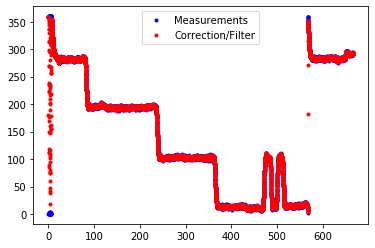

In [80]:
plt.plot(time_stamps, yaw_dict['measurements'], 'b.')
plt.plot(time_stamps, yaw_dict['estimates'], 'r.')
plt.legend(['Measurements', 'Correction/Filter'])
plt.show()

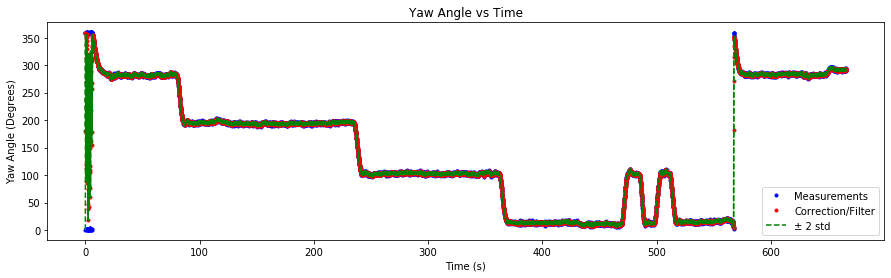

In [81]:
plt.figure(figsize=(15,4))
plt.plot(time_stamps, yaw_dict['measurements'], 'b.')
plt.plot(time_stamps, yaw_dict['estimates'], 'r.')
#plt.legend(['Measurements', 'Correction/Filter'])
plt.plot(time_stamps, yaw_dict['plus_2_stddev'], 'g--')
plt.plot(time_stamps, yaw_dict['minus_2_stddev'], 'g--')
plt.xlabel('Time (s)')
plt.ylabel('Yaw Angle (Degrees)')
plt.title('Yaw Angle vs Time')
plt.legend(['Measurements', 'Correction/Filter', '± 2 std'])
plt.show()

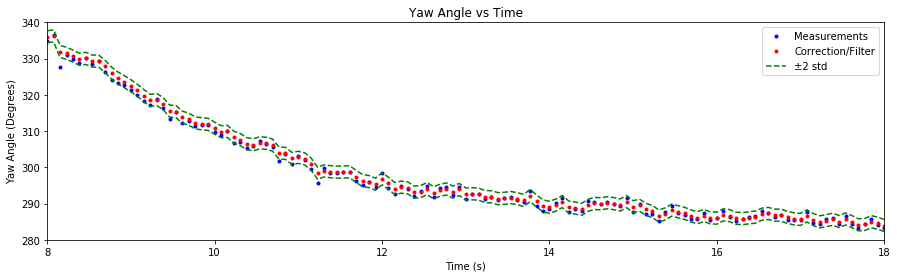

In [90]:
plt.figure(figsize=(15,4))
plt.plot(time_stamps, yaw_dict['measurements'], 'b.')
plt.plot(time_stamps, yaw_dict['estimates'], 'r.')
plt.plot(time_stamps, yaw_dict['plus_2_stddev'], 'g--')
plt.plot(time_stamps, yaw_dict['minus_2_stddev'], 'g--')
plt.xlabel('Time (s)')
plt.ylabel('Yaw Angle (Degrees)')
plt.title('Yaw Angle vs Time')
plt.legend(['Measurements', 'Correction/Filter', '±2 std'])
plt.xlim([8, 18])
plt.ylim([280, 340])
plt.show()